In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os

In [4]:
dir='/content/drive/MyDrive/NAD'

In [5]:
path=[]
for case in os.listdir(dir):
  path.append(os.path.join(dir,case))

In [6]:
df=pd.read_csv(path[0],sep=',')

In [7]:
df.columns=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"]

In [8]:
test=pd.read_csv(path[1],sep=',')

In [9]:
test.columns=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"]

In [10]:
df.isnull().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
land                      0
wrongfragment             0
urgent                    0
hot                       0
numfailedlogins           0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
numoutboundcmds           0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportra

In [11]:
df.duplicated().any()

False

In [12]:
df.dtypes

duration                    int64
protocoltype               object
service                    object
flag                       object
srcbytes                    int64
dstbytes                    int64
land                        int64
wrongfragment               int64
urgent                      int64
hot                         int64
numfailedlogins             int64
loggedin                    int64
numcompromised              int64
rootshell                   int64
suattempted                 int64
numroot                     int64
numfilecreations            int64
numshells                   int64
numaccessfiles              int64
numoutboundcmds             int64
ishostlogin                 int64
isguestlogin                int64
count                       int64
srvcount                    int64
serrorrate                float64
srvserrorrate             float64
rerrorrate                float64
srvrerrorrate             float64
samesrvrate               float64
diffsrvrate   

In [13]:
categorical_columns=['protocoltype','service','flag','attack']

In [14]:
for col in categorical_columns:
  print(f'Column : {col}\n')
  print(f'Number of Unique Categorical Entries : {df[col].value_counts()}')

Column : protocoltype

Number of Unique Categorical Entries : protocoltype
tcp     102688
udp      14993
icmp      8291
Name: count, dtype: int64
Column : service

Number of Unique Categorical Entries : service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6859
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: count, Length: 70, dtype: int64
Column : flag

Number of Unique Categorical Entries : flag
SF        74944
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64
Column : attack

Number of Unique Categorical Entries : attack
normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop          

In [15]:

categorical_columns=['protocoltype','service','flag']

In [16]:
for col in categorical_columns:
  unique_services=list(df[col].unique())+list(test[col].unique())
  unique_services=set(unique_services)
  print(len(unique_services))
  d={}
  for i, key in enumerate(unique_services):
    d[key]=i
  df[col]=df[col].map(d)
  test[col]=test[col].map(d)

3
70
11


In [17]:
df['attack']=df['attack'].apply(lambda x: 1 if x!='normal' else 0)

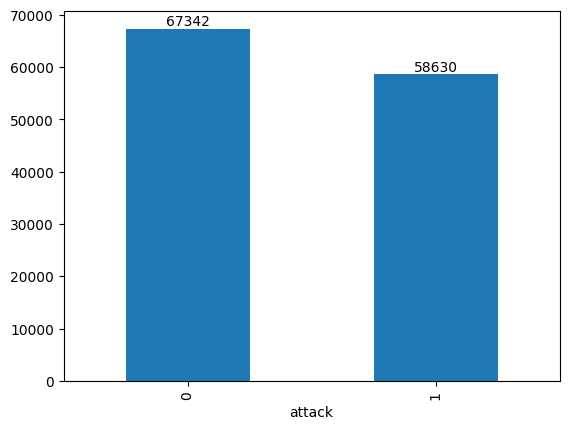

In [18]:
ax=df.attack.value_counts().plot(kind='bar')
for bars in ax.containers:
  ax.bar_label(bars)
plt.show()

In [19]:
test['attack']=test['attack'].apply(lambda x: 1 if x!='normal' else 0)

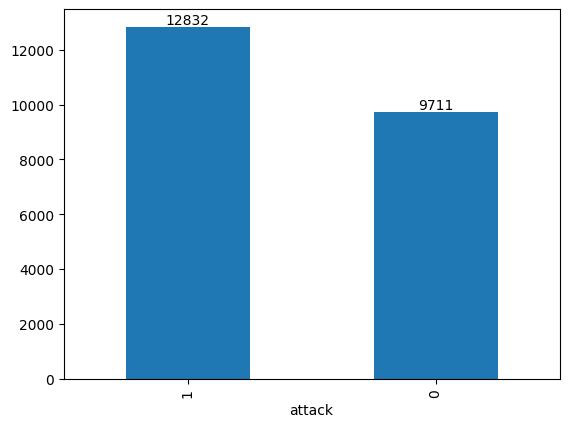

In [20]:
ax=test.attack.value_counts().plot(kind='bar')
for bars in ax.containers:
  ax.bar_label(bars)
plt.show()

In [21]:
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,1,38,10,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,0,15
1,0,0,36,1,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,1,19
2,0,0,53,10,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,0,21
3,0,0,53,10,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0,21
4,0,0,36,9,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,1,21


In [22]:
import seaborn as sns

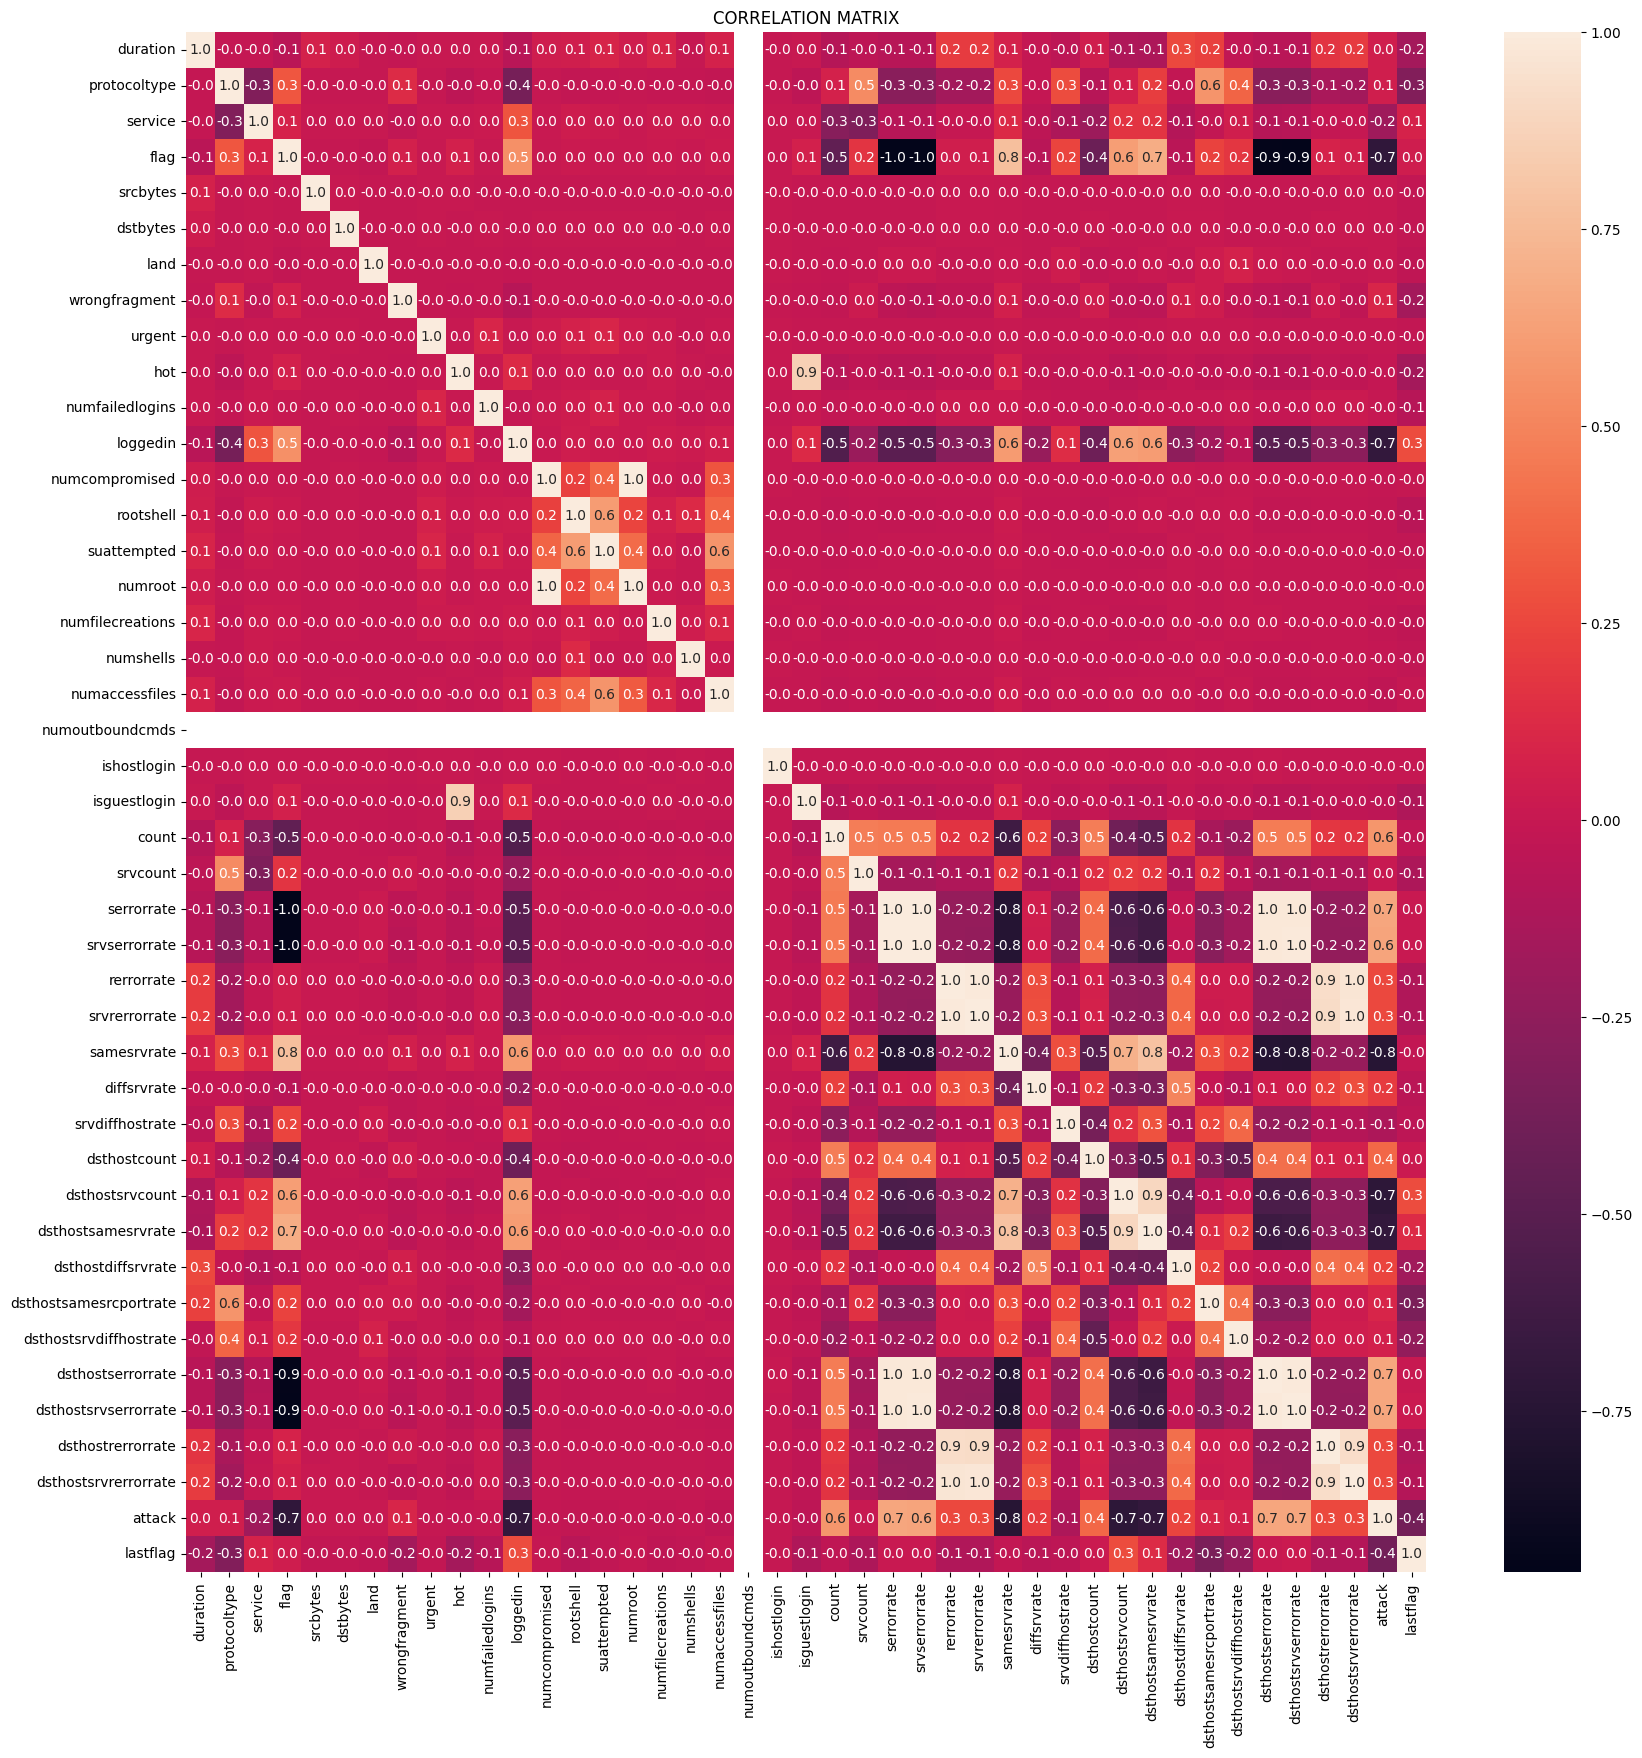

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt='0.1f')
plt.title('CORRELATION MATRIX')
plt.show()

In [24]:
d={}
for col in df.columns:
  d[col]=len(df[df[col]==0])/len(df)*100

In [25]:
d

{'duration': 92.04743911345379,
 'protocoltype': 81.51652748229765,
 'service': 0.6842790461372369,
 'flag': 0.10081605436128664,
 'srcbytes': 39.20871304734385,
 'dstbytes': 53.95325945448195,
 'land': 99.98015432000761,
 'wrongfragment': 99.13472835233227,
 'urgent': 99.99285555520274,
 'hot': 97.8796875496142,
 'numfailedlogins': 99.90315308163719,
 'loggedin': 60.42612644079637,
 'numcompromised': 98.979138221192,
 'rootshell': 99.86584320325152,
 'suattempted': 99.93649382402438,
 'numroot': 99.48480614739783,
 'numfilecreations': 99.77217159368749,
 'numshells': 99.96269012161433,
 'numaccessfiles': 99.70549010891308,
 'numoutboundcmds': 100.0,
 'ishostlogin': 99.9992061728003,
 'isguestlogin': 99.05772711396183,
 'count': 0.010319753596037215,
 'srvcount': 0.010319753596037215,
 'serrorrate': 68.92642809513225,
 'srvserrorrate': 70.45454545454545,
 'rerrorrate': 87.1479376369352,
 'srvrerrorrate': 87.13523640174007,
 'samesrvrate': 2.1957260343568414,
 'diffsrvrate': 60.50233385

In [26]:
df.drop(columns=['land','urgent','numshells','numfailedlogins','suattempted','ishostlogin'],inplace=True)

In [27]:
test.drop(columns=['land','urgent','numshells','numfailedlogins','suattempted','ishostlogin'],inplace=True)

In [28]:
df.shape

(125972, 37)

In [29]:
X=df.drop(columns=['attack'])
y=df['attack']

In [30]:
X.skew()

duration                   11.880182
protocoltype                2.157678
service                    -0.629259
flag                       -0.844434
srcbytes                  190.668590
dstbytes                  290.051760
wrongfragment              11.457942
hot                        12.589835
loggedin                    0.426424
numcompromised            250.106891
rootshell                  27.247302
numroot                   236.912784
numfilecreations           55.665120
numaccessfiles             45.554780
numoutboundcmds             0.000000
isguestlogin               10.155705
count                       1.514264
srvcount                    4.694142
serrorrate                  0.963188
srvserrorrate               0.970585
rerrorrate                  2.325518
srvrerrorrate               2.327019
samesrvrate                -0.572487
diffsrvrate                 4.379796
srvdiffhostrate             2.860339
dsthostcount               -0.833443
dsthostsrvcount             0.283707
d

In [31]:
from sklearn.preprocessing import PowerTransformer

<ipython-input-32-8a5ef81f2cc7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col],ax=ax[0])
<ipython-input-32-8a5ef81f2cc7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col],ax=ax[1])


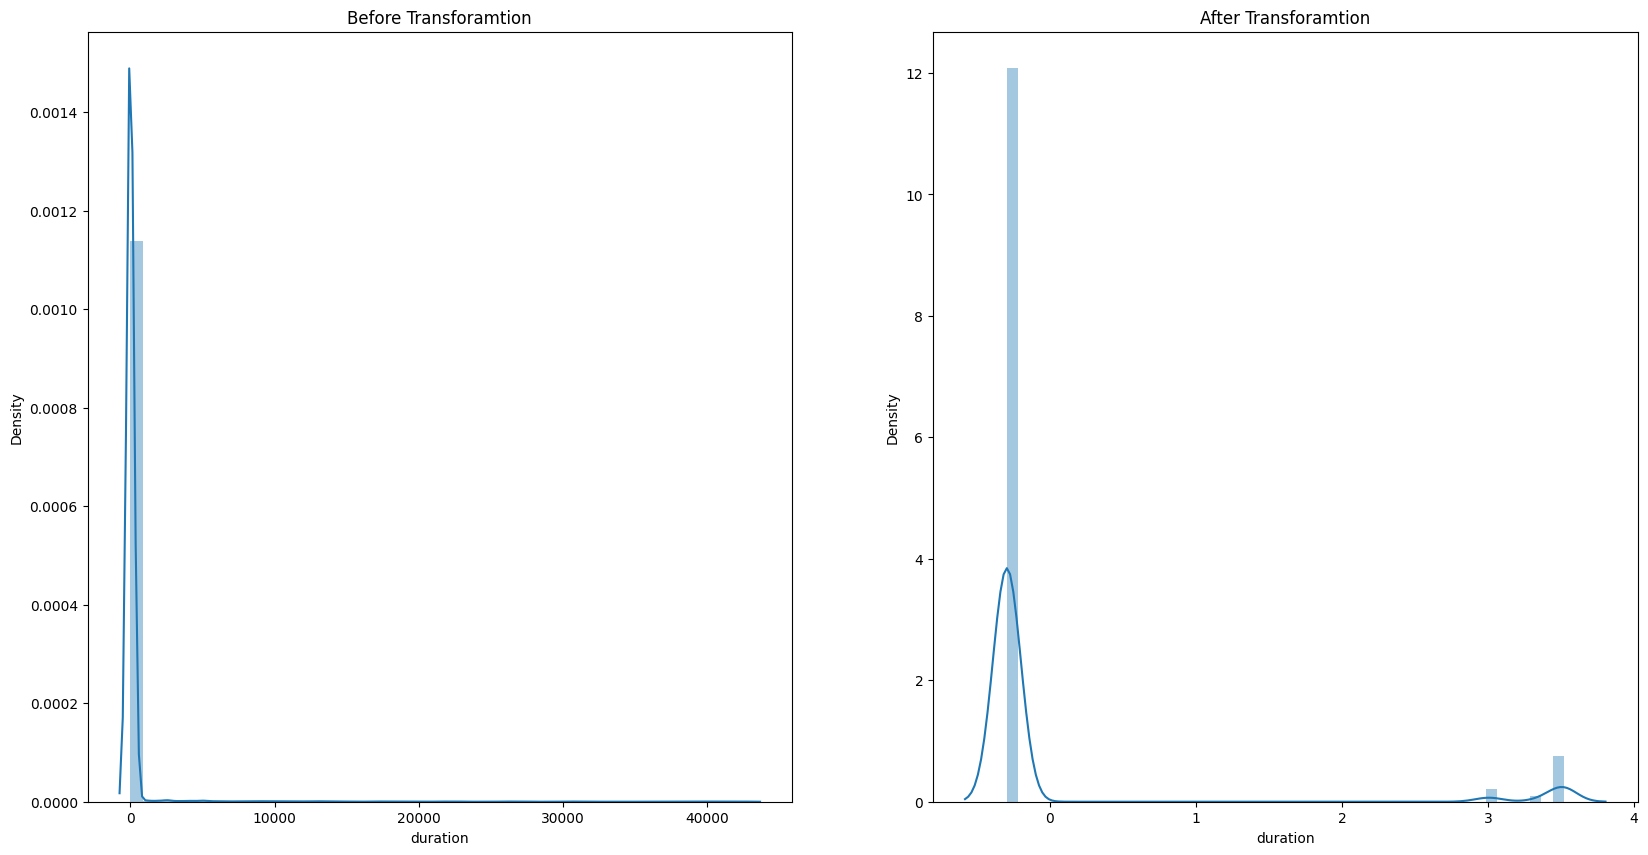

<ipython-input-32-8a5ef81f2cc7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col],ax=ax[0])
<ipython-input-32-8a5ef81f2cc7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col],ax=ax[1])


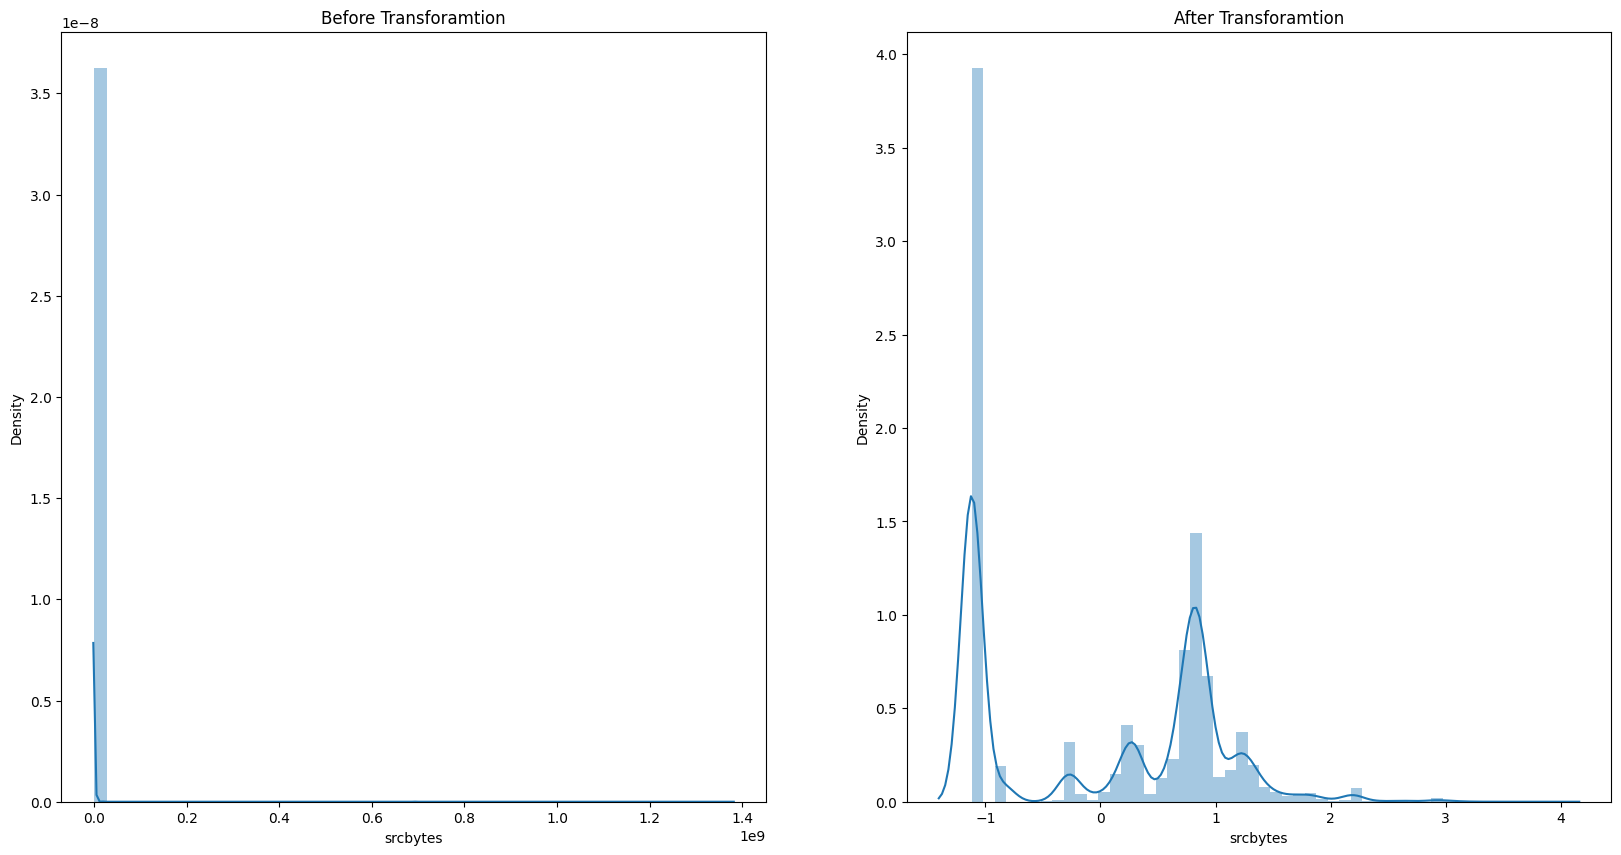

<ipython-input-32-8a5ef81f2cc7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col],ax=ax[0])
<ipython-input-32-8a5ef81f2cc7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col],ax=ax[1])


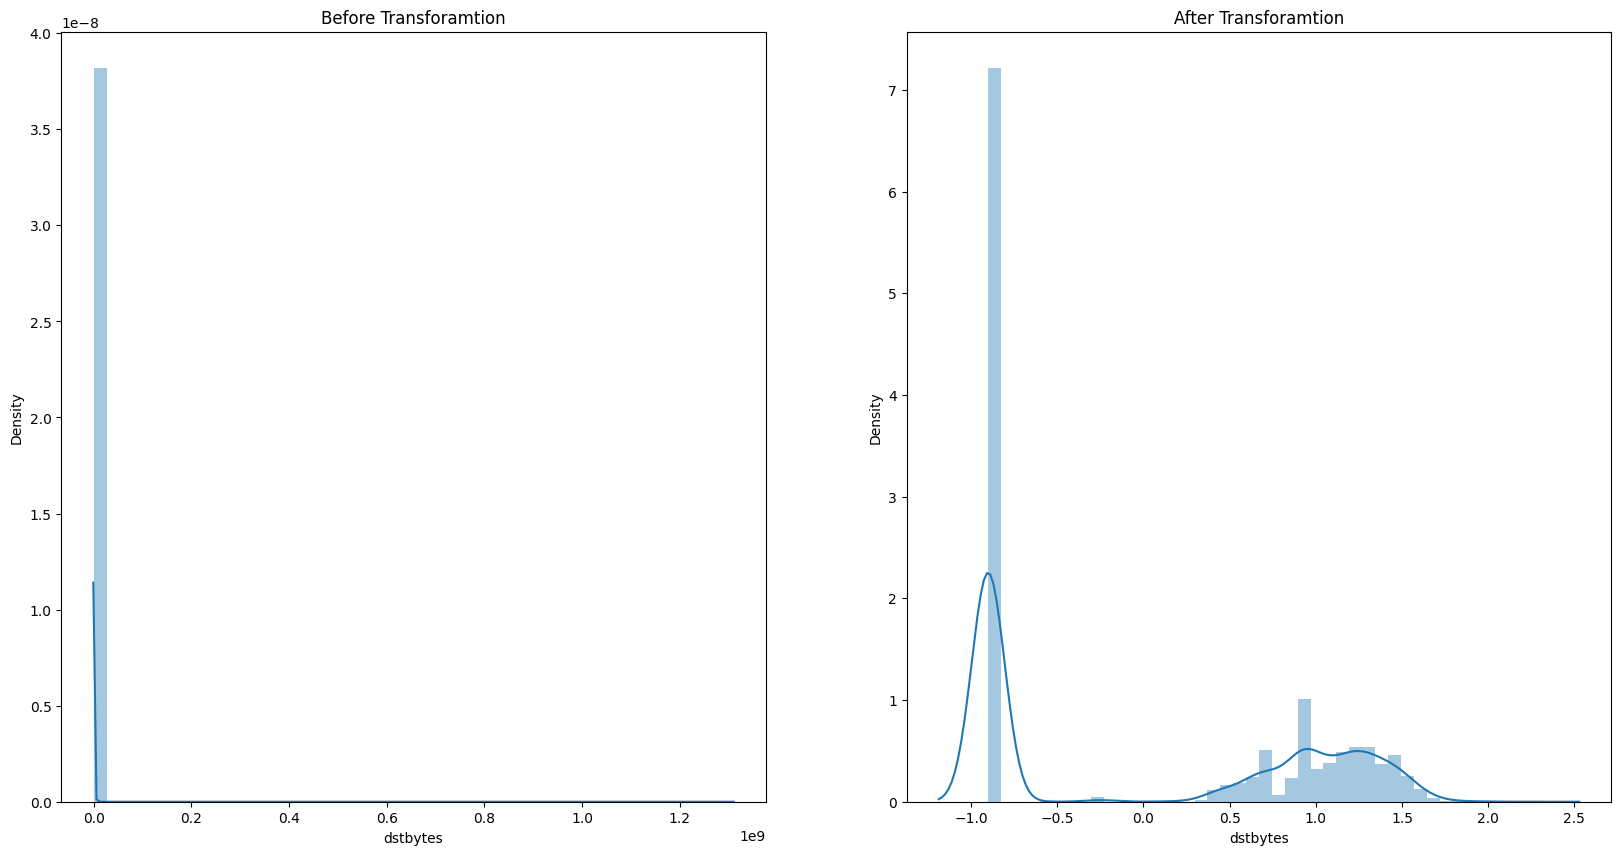

<ipython-input-32-8a5ef81f2cc7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col],ax=ax[0])
<ipython-input-32-8a5ef81f2cc7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col],ax=ax[1])


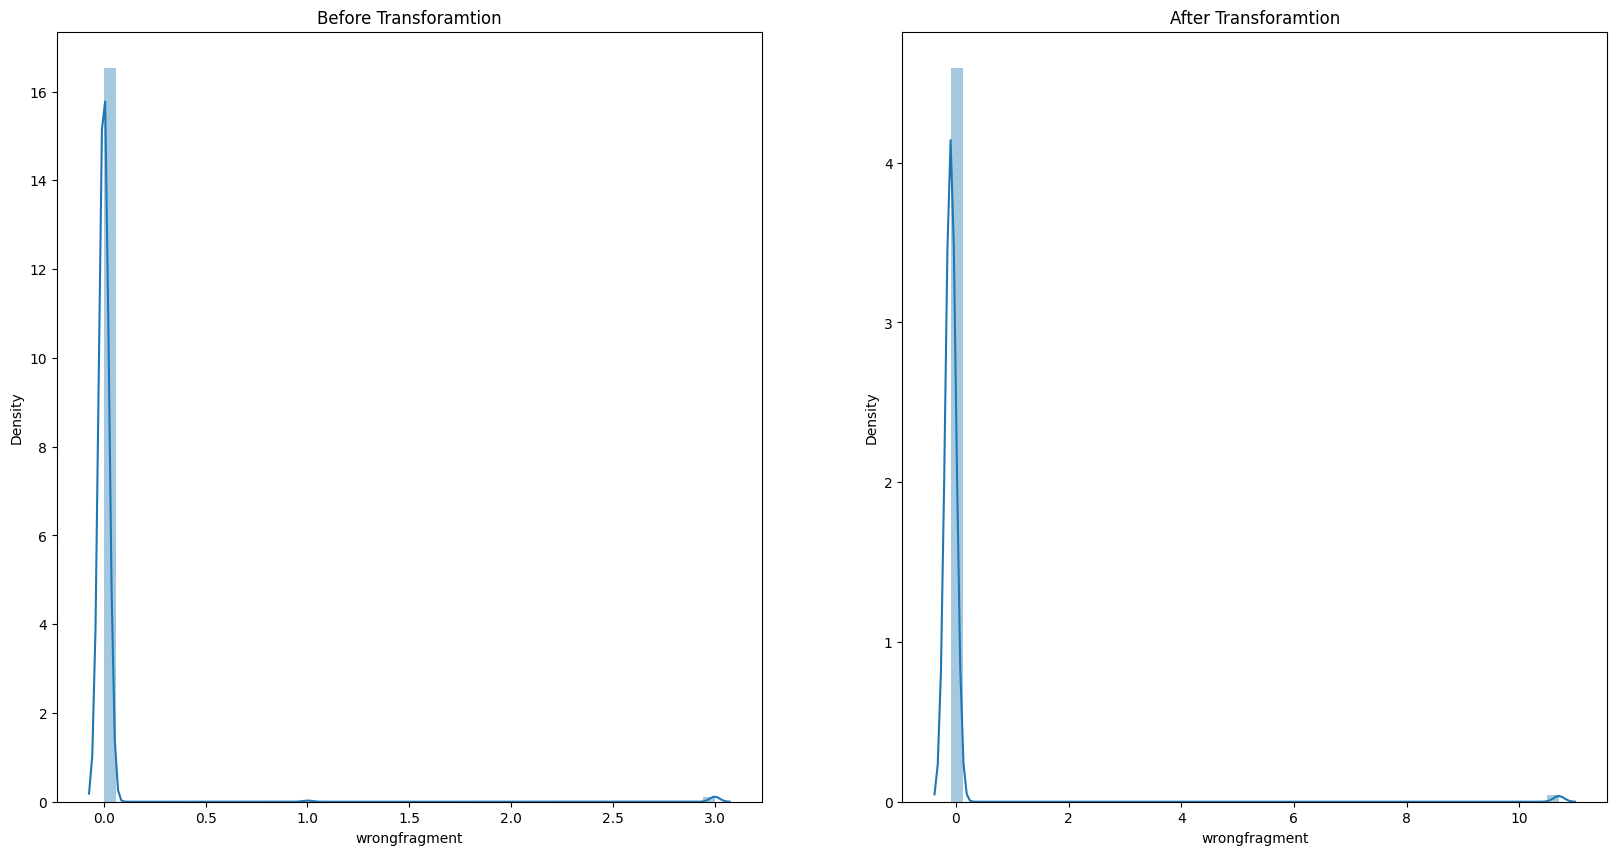

<ipython-input-32-8a5ef81f2cc7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col],ax=ax[0])
<ipython-input-32-8a5ef81f2cc7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col],ax=ax[1])


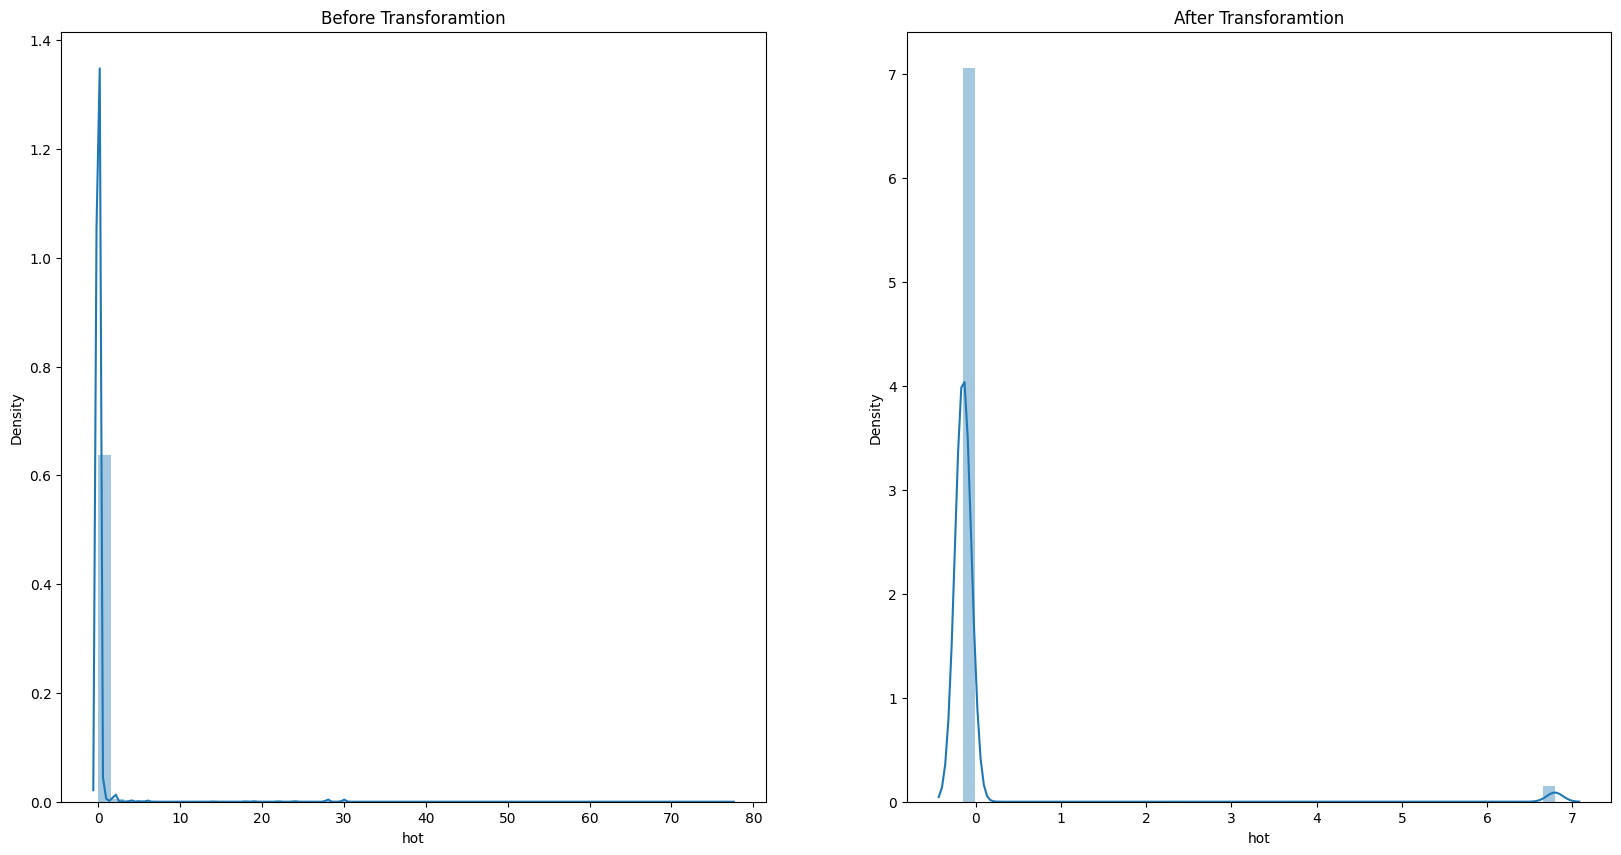

<ipython-input-32-8a5ef81f2cc7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col],ax=ax[0])
<ipython-input-32-8a5ef81f2cc7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col],ax=ax[1])


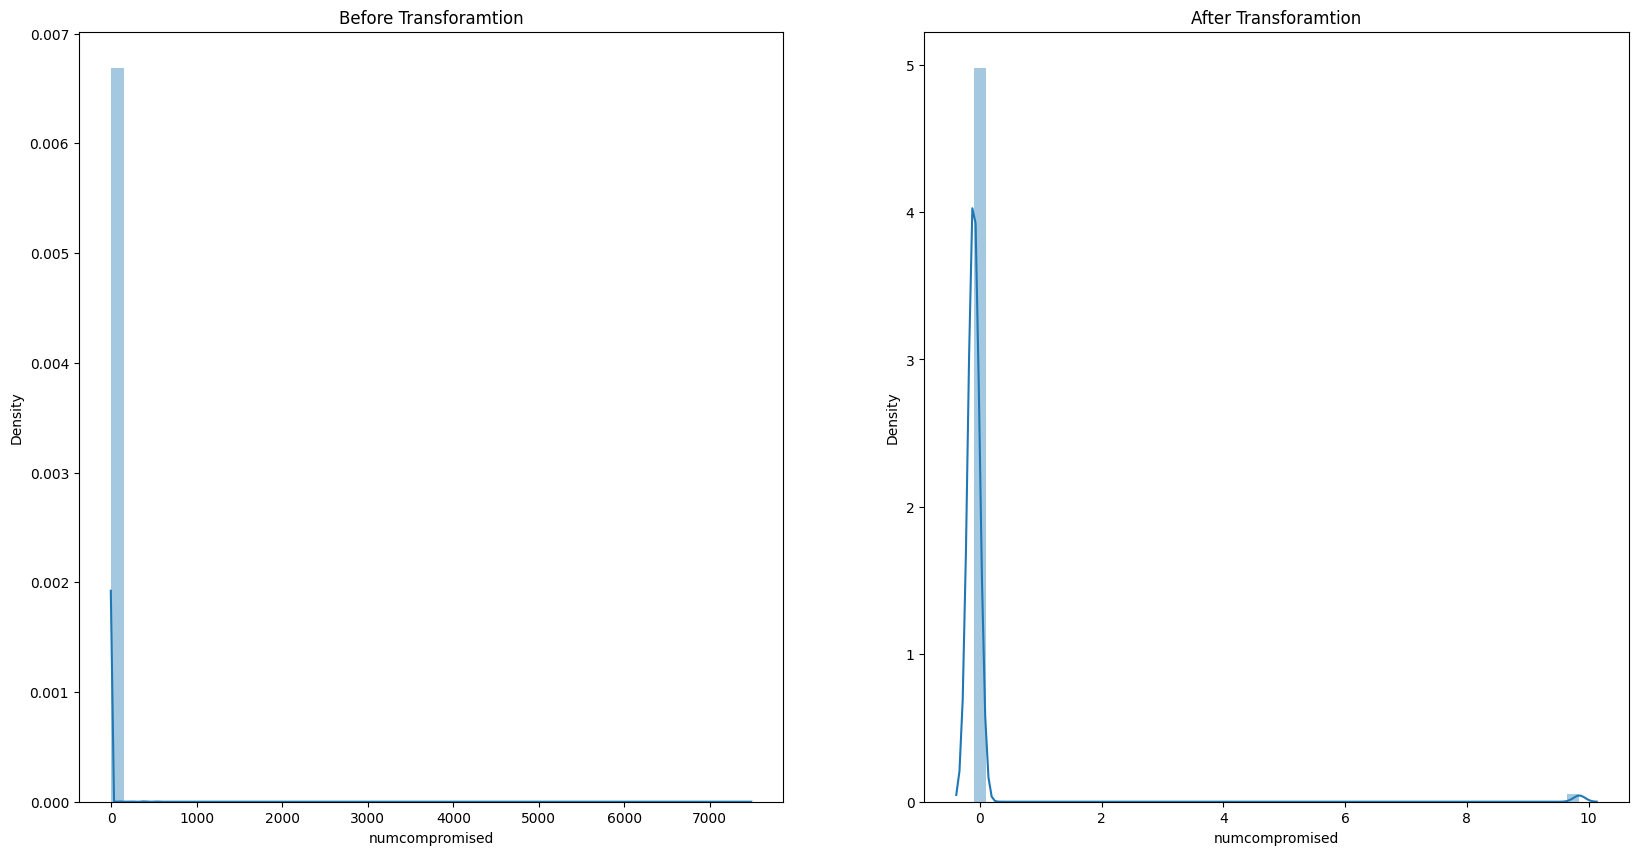

<ipython-input-32-8a5ef81f2cc7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col],ax=ax[0])
<ipython-input-32-8a5ef81f2cc7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col],ax=ax[1])


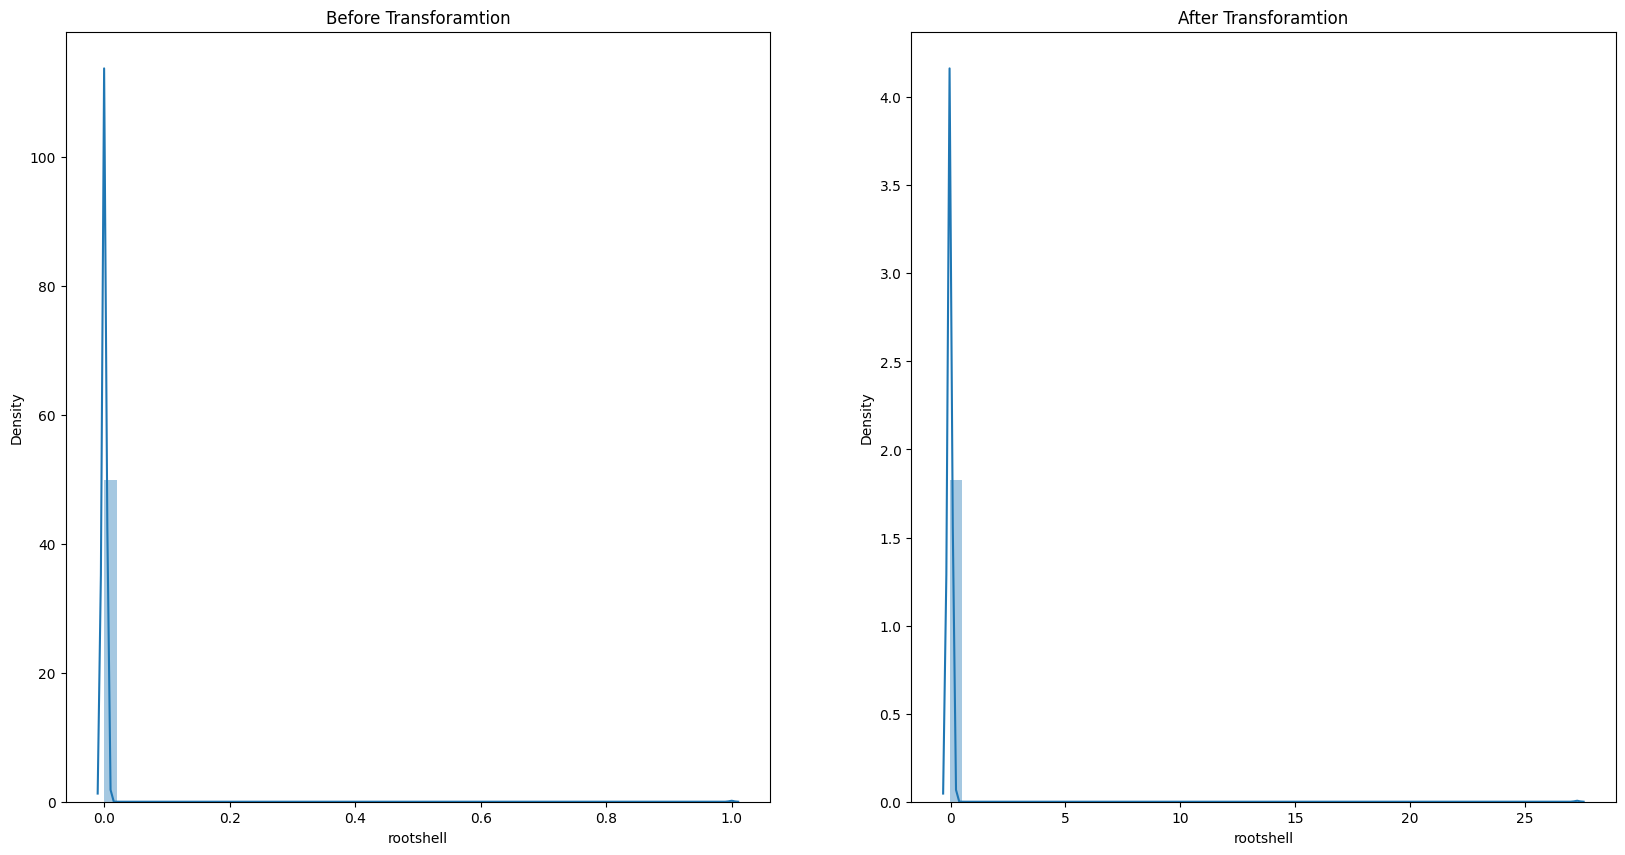

<ipython-input-32-8a5ef81f2cc7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col],ax=ax[0])
<ipython-input-32-8a5ef81f2cc7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col],ax=ax[1])


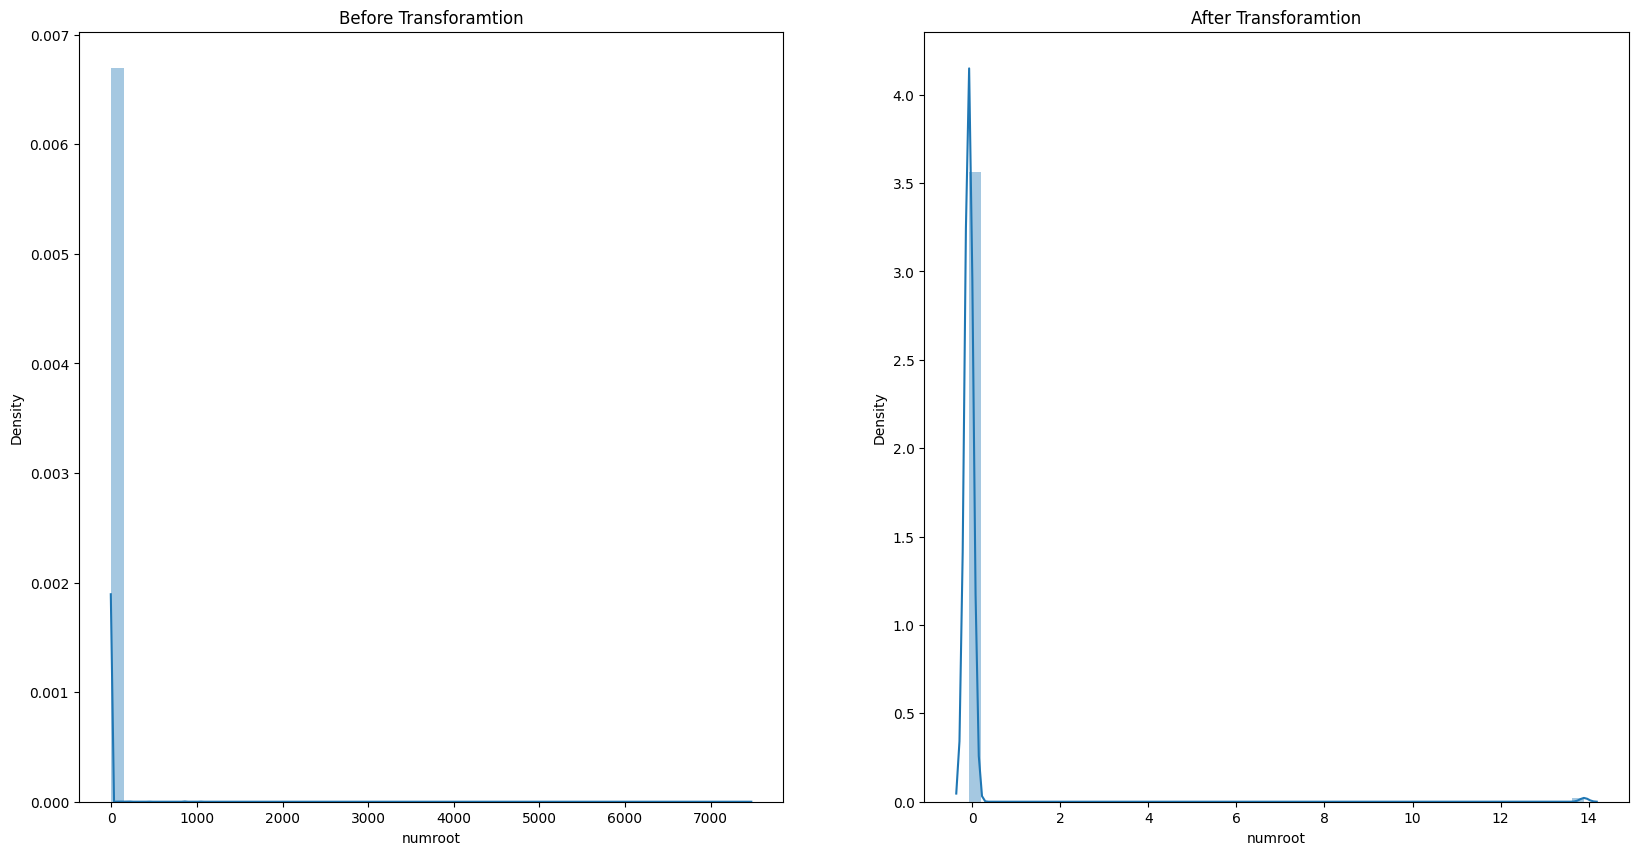

<ipython-input-32-8a5ef81f2cc7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col],ax=ax[0])
<ipython-input-32-8a5ef81f2cc7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col],ax=ax[1])


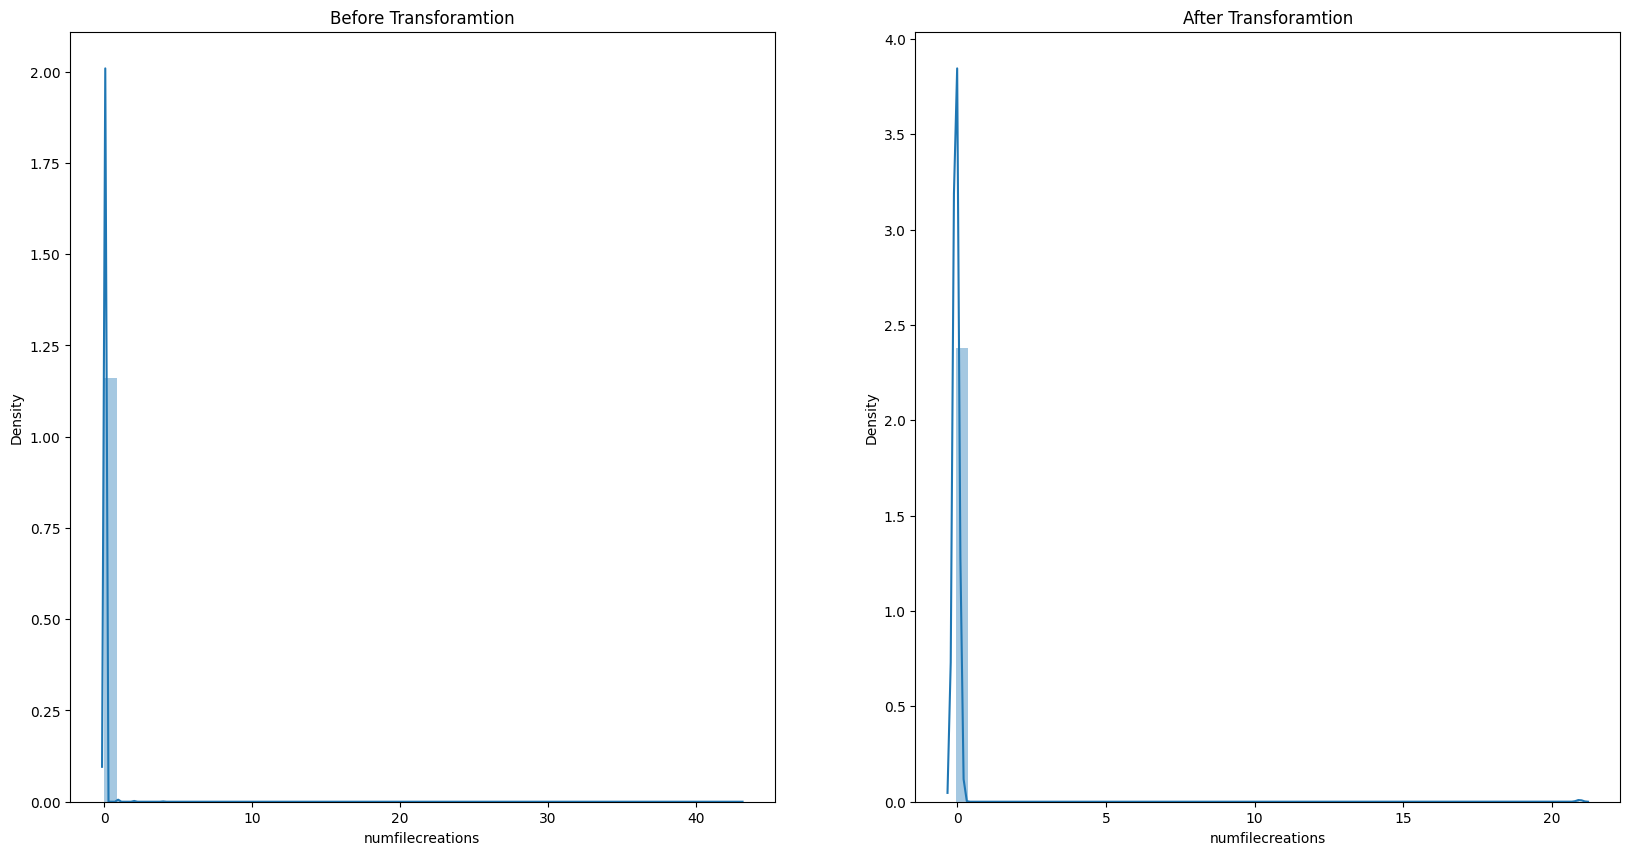

<ipython-input-32-8a5ef81f2cc7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col],ax=ax[0])
<ipython-input-32-8a5ef81f2cc7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col],ax=ax[1])


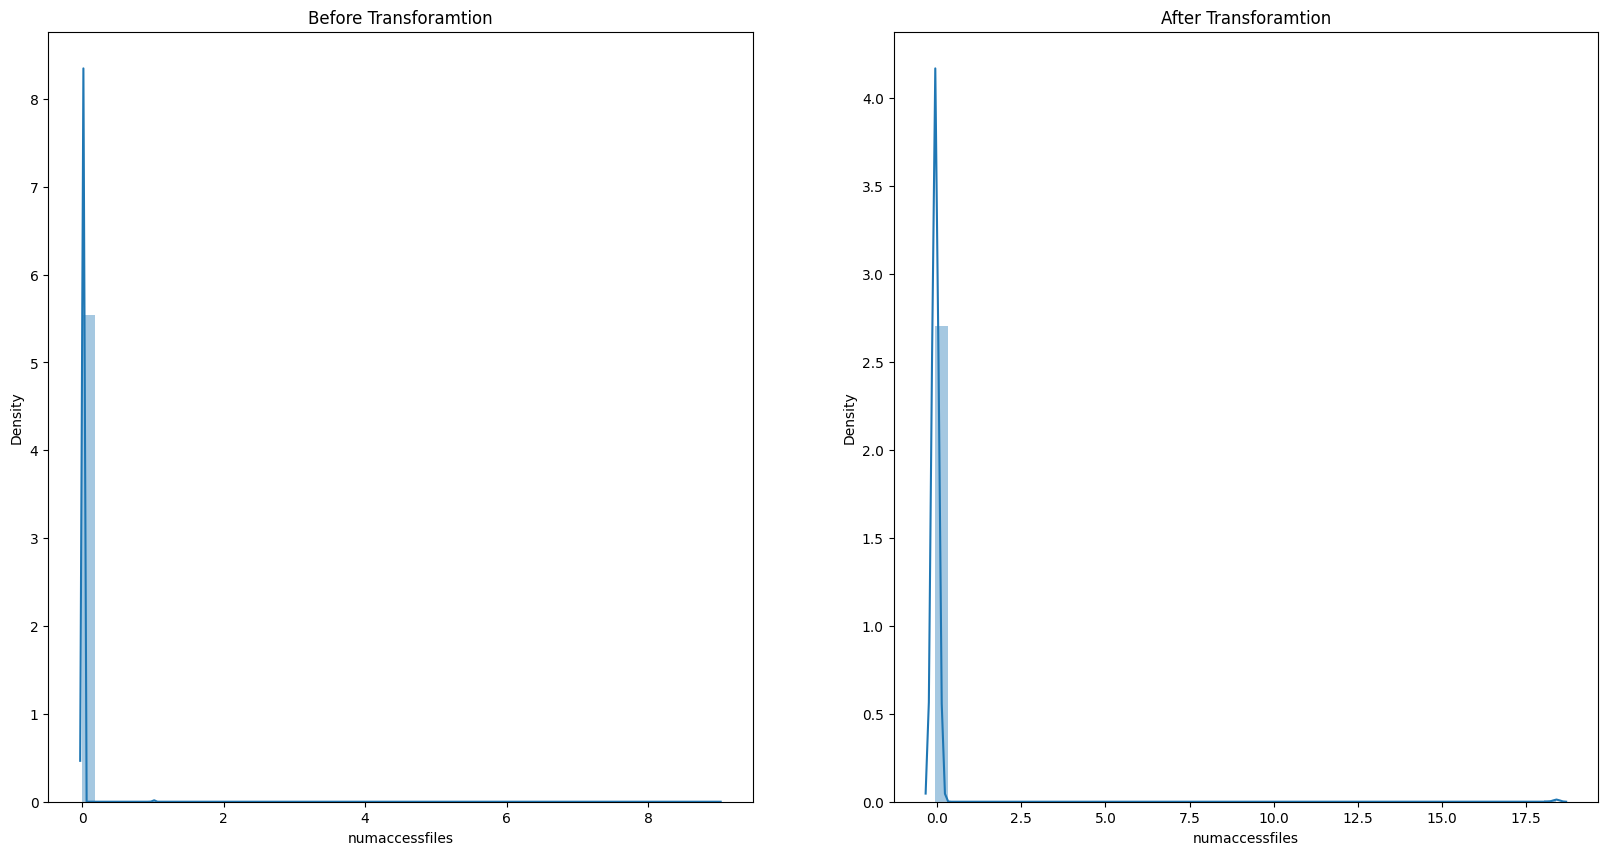

<ipython-input-32-8a5ef81f2cc7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col],ax=ax[0])
<ipython-input-32-8a5ef81f2cc7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col],ax=ax[1])


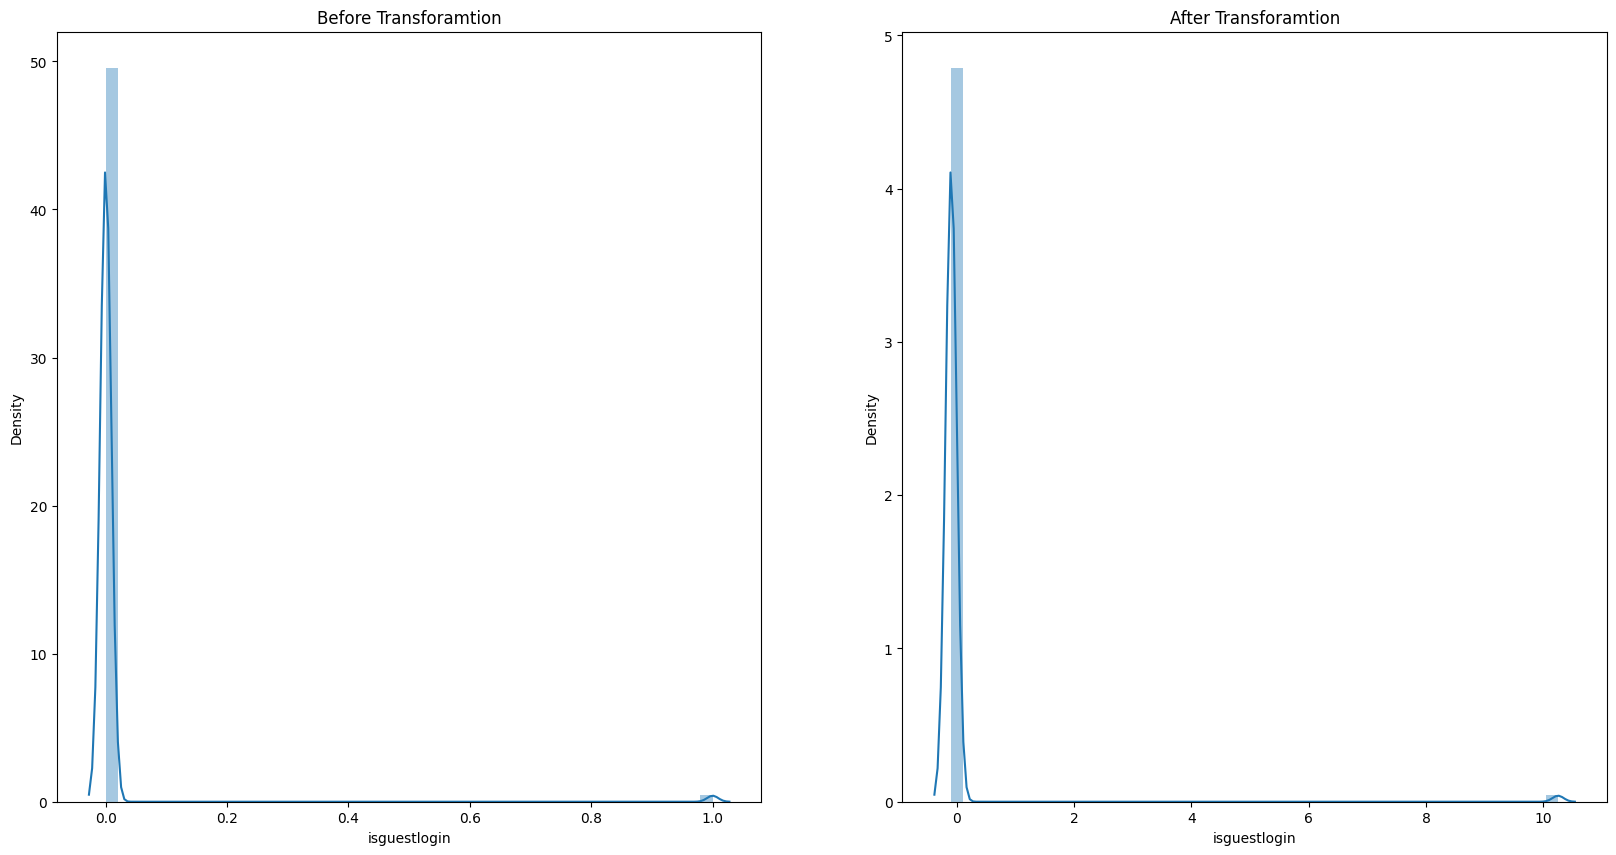

In [32]:
for col in ['duration','srcbytes','dstbytes','wrongfragment','hot','numcompromised','rootshell','numroot','numfilecreations','numaccessfiles','isguestlogin']:
  fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
  sns.distplot(X[col],ax=ax[0])
  ax[0].set_title('Before Transforamtion')
  p=PowerTransformer(method='yeo-johnson')
  X[col]=p.fit_transform(np.array(X[col]).reshape(-1,1))
  sns.distplot(X[col],ax=ax[1])
  ax[1].set_title('After Transforamtion')
  plt.show()

In [33]:
X.skew()

duration                   3.124848
protocoltype               2.157678
service                   -0.629259
flag                      -0.844434
srcbytes                   0.073041
dstbytes                   0.296443
wrongfragment             10.610469
hot                        6.647223
loggedin                   0.426424
numcompromised             9.745205
rootshell                 27.247302
numroot                   13.824306
numfilecreations          20.879164
numaccessfiles            18.345521
numoutboundcmds            0.000000
isguestlogin              10.155705
count                      1.514264
srvcount                   4.694142
serrorrate                 0.963188
srvserrorrate              0.970585
rerrorrate                 2.325518
srvrerrorrate              2.327019
samesrvrate               -0.572487
diffsrvrate                4.379796
srvdiffhostrate            2.860339
dsthostcount              -0.833443
dsthostsrvcount            0.283707
dsthostsamesrvrate        -0

In [34]:
def normalize(col,df):
  A=np.ones(len(df))
  min=df[col].min()
  Min=A*min
  max=df[col].max()
  Max=A*max
  res=(df[col]-Min)/(Max-Min)
  return res

In [35]:
for col in X.columns:
  df[col]=normalize(col,df)
  test[col]=normalize(col,test)

In [36]:
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,wrongfragment,hot,loggedin,numcompromised,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0.0,0.5,0.550725,1.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,0,0.714286
1,0.0,0.0,0.521739,0.1,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,1,0.904762
2,0.0,0.0,0.768116,1.0,1.681203e-07,6.223962e-06,0.0,0.0,1.0,0.0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,0,1.000000
3,0.0,0.0,0.768116,1.0,1.442067e-07,3.206260e-07,0.0,0.0,1.0,0.0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0,1.000000
4,0.0,0.0,0.521739,0.9,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,1,1.000000


In [37]:
test.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,wrongfragment,hot,loggedin,numcompromised,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0.000000,0.0,0.521739,0.9,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1,1.000000
1,0.000035,0.0,0.985507,1.0,2.066513e-04,0.000000,0.0,0.0,0.0,0.0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0,1.000000
2,0.000000,1.0,0.536232,1.0,3.183413e-07,0.000000,0.0,0.0,0.0,0.0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1,0.714286
3,0.000017,0.0,0.855072,0.6,0.000000e+00,0.000011,0.0,0.0,0.0,0.0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1,0.523810
4,0.000000,0.0,0.768116,1.0,4.249857e-06,0.010784,0.0,0.0,1.0,0.0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,0,1.000000


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [40]:
rf=RandomForestClassifier()
lr=LogisticRegression()
x=XGBClassifier()
dt=DecisionTreeClassifier()
gb=GradientBoostingClassifier()

In [41]:
rf.fit(X_train,y_train)
lr.fit(X_train,y_train)
x.fit(X_train,y_train)
dt.fit(X_train,y_train)
gb.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GradientBoostingClassifier()

In [42]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay

In [43]:
y_pred1=rf.predict(X_test)
y_pred2=lr.predict(X_test)
y_pred3=x.predict(X_test)
y_pred4=dt.predict(X_test)
y_pred5=gb.predict(X_test)

In [44]:
a=[]
p=[]
r=[]
f=[]
c=[]

In [45]:
for y_pred in [y_pred1,y_pred2,y_pred3,y_pred4,y_pred5]:
  a.append(accuracy_score(y_test,y_pred))
  p.append(precision_score(y_test,y_pred))
  r.append(recall_score(y_test,y_pred))
  f.append(f1_score(y_test,y_pred))
  c.append(confusion_matrix(y_test,y_pred))

In [46]:
metrics=pd.DataFrame({'Models':['RF Classifier','Logistic Regression','XGB Classifier','Decision Tree Classifier','Gradient Boosting Classifier'],'Accuracy Score':a,'Precision Score':p,'Recall Score':r,'F1 Score':f,'Confusion Matrix':c})

In [47]:
metrics

,Models,Accuracy Score,Precision Score,Recall Score,F1 Score,Confusion Matrix
0,RF Classifier,0.999722,0.999744,0.999658,0.999701,"[[13491, 3], [4, 11697]]"
1,Logistic Regression,0.976067,0.971293,0.977352,0.974313,"[[13156, 338], [265, 11436]]"
2,XGB Classifier,0.999524,0.999487,0.999487,0.999487,"[[13488, 6], [6, 11695]]"
3,Decision Tree Classifier,0.999087,0.998634,0.999402,0.999018,"[[13478, 16], [7, 11694]]"
4,Gradient Boosting Classifier,0.997658,0.995995,0.998974,0.997483,"[[13447, 47], [12, 11689]]"


In [48]:
melt=metrics.melt(id_vars='Models',value_vars=['Accuracy Score','Precision Score','Recall Score','F1 Score'],var_name='Metrics',value_name='Score')

In [49]:
melt

,Models,Metrics,Score
0,RF Classifier,Accuracy Score,0.999722
1,Logistic Regression,Accuracy Score,0.976067
2,XGB Classifier,Accuracy Score,0.999524
3,Decision Tree Classifier,Accuracy Score,0.999087
4,Gradient Boosting Classifier,Accuracy Score,0.997658
5,RF Classifier,Precision Score,0.999744
6,Logistic Regression,Precision Score,0.971293
7,XGB Classifier,Precision Score,0.999487
8,Decision Tree Classifier,Precision Score,0.998634
9,Gradient Boosting Classifier,Precision Score,0.995995


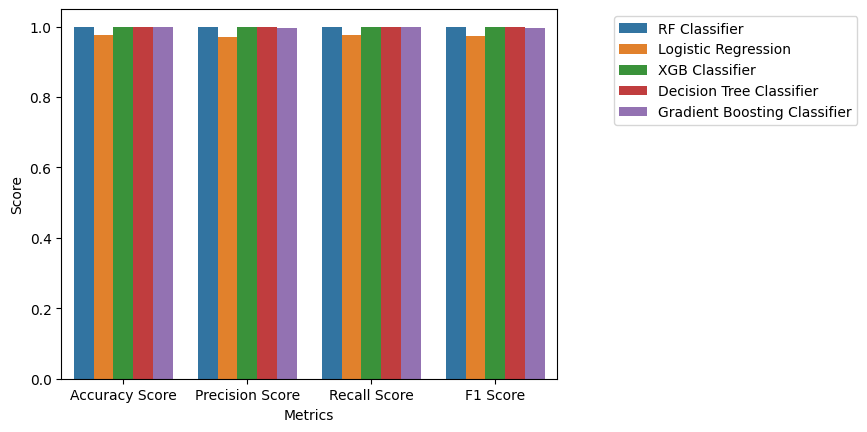

In [50]:
sns.barplot(x='Metrics',y='Score',hue='Models',data=melt)
plt.legend(bbox_to_anchor=(1.1,1))